#### Impact of outliers on machine learning models
1. Which Machine LEarning Models Are Sensitive To Outliers?
2. Naivye Bayes Classifier--- Not Sensitive To Outliers
3. SVM-------- Not Sensitive To Outliers
4. Linear Regression---------- Sensitive To Outliers
5. Logistic Regression------- Sensitive To Outliers
6. Decision Tree Regressor or Classifier---- Not Sensitive
7. Ensemble(RF,XGboost,GB)------- Not Sensitive
8. KNN--------------------------- Not Sensitive
9. Kmeans------------------------ Sensitive
10. Hierarichal------------------- Sensitive
11. PCA-------------------------- Sensitive
12. Neural Networks-------------- Sensitive

In [46]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
df.age.isnull().sum()

177

/Users/abhisheksingh/miniforge3/envs/vicas/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

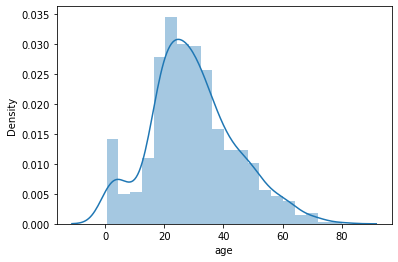

In [48]:
import seaborn as sns
sns.distplot(df.age.dropna())

/Users/abhisheksingh/miniforge3/envs/vicas/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

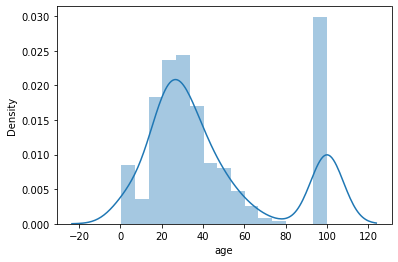

In [49]:
sns.distplot(df.age.fillna(100))

Text(0, 0.5, 'no of passenger')

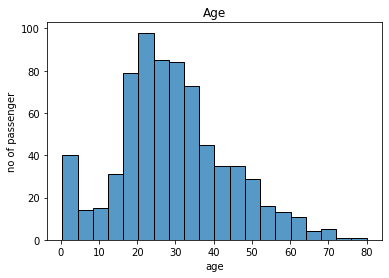

In [50]:
fig = sns.histplot(data=df,x='age')
fig.set_title('Age')
fig.set_xlabel('age')
fig.set_ylabel('no of passenger')

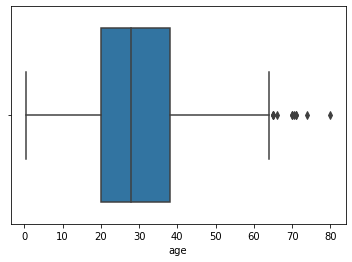

In [51]:
fig = sns.boxplot(data=df,x='age')

In [52]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

#### If The Data Is Normally Distributed We use below technique

In [53]:
### Assuming Age follows the gaussian distribution graph and we will calculate the boundaries that difference between the outliers
upper_boundary = df['age'].mean()+3*df.age.std()
lower_boundary = df['age'].mean()-3*df.age.std()
print(lower_boundary)
print(upper_boundary)
print(df.age.mean())

-13.880374349943303
73.27860964406094
29.69911764705882


#### if the feature is skewed we use below technique

Text(0, 0.5, 'no of passenger')

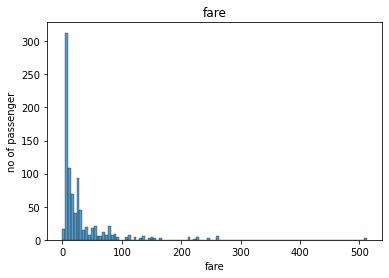

In [54]:
fig = sns.histplot(data=df,x='fare')
fig.set_title('fare')
fig.set_xlabel('fare')
fig.set_ylabel('no of passenger')

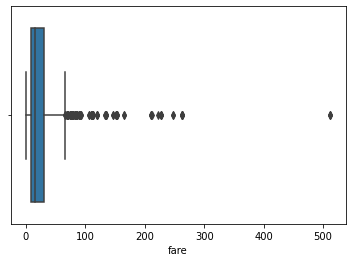

In [55]:
fig = sns.boxplot(data=df,x='fare')

In [56]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [57]:
## calculate the IQR for calculating the boundaries
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)
IQR

23.0896

In [58]:
lower_bridge = df.fare.quantile(0.25)-(IQR*1.5)
upper_bridge = df.fare.quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [59]:
## Extreme outliers
lower_bridge = df.fare.quantile(0.25)-(IQR*3)
upper_bridge = df.fare.quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [60]:
data = df.copy()

In [61]:
data.loc[data['age']>73,'age']=73

In [62]:
data.loc[data['fare']>100,'fare']=100

Text(0, 0.5, 'no of passenger')

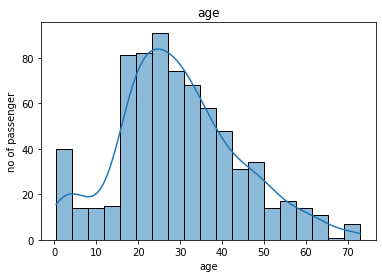

In [63]:
fig = sns.histplot(data=data,x='age',kde=True)
fig.set_title('age')
fig.set_xlabel('age')
fig.set_ylabel('no of passenger')

Text(0, 0.5, 'no of passenger')

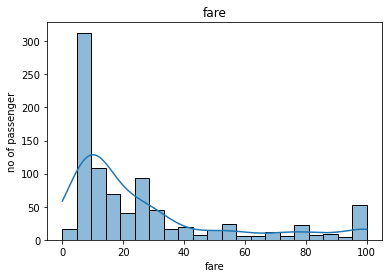

In [64]:
fig = sns.histplot(data=data,x='fare',kde=True)
fig.set_title('fare')
fig.set_xlabel('fare')
fig.set_ylabel('no of passenger')

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size=0.3)

In [66]:
## Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accuracy score of model is {accuracy_score(y_test,y_pred)}")
print(f"roc auc score of model is {roc_auc_score(y_test,y_pred1[:,1])}")

Accuracy score of model is 0.6977611940298507
roc auc score of model is 0.7219792865362485


In [ ]:
## Logistic regression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accuracy score of model is {accuracy_score(y_test,y_pred)}")
print(f"roc auc score of model is {roc_auc_score(y_test,y_pred1[:,1])}")

Accuracy score of model is 0.6828358208955224
roc auc score of model is 0.7261507479861912
